In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width', 'label']

In [3]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [4]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width  label
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
5             5.4          3.9           1.7          0.4      0
6             4.6          3.4           1.4          0.3      0
7             5.0          3.4           1.5          0.2      0
8             4.4          2.9           1.4          0.2      0
9             4.9          3.1           1.5          0.1      0
10            5.4          3.7           1.5          0.2      0
11            4.8          3.4           1.6          0.2      0
12            4.8          3.0           1.4          0.1      0
13            4.3          3.0           1.1          0.1      0
14            5.8        

In [5]:
train, test = train_test_split(data, test_size=0.1)

In [6]:
x0 = np.array([x0 for i, x0 in enumerate(train) if train[i][-1] == 0])
x1 = np.array([x1 for i, x1 in enumerate(train) if train[i][-1] == 1])

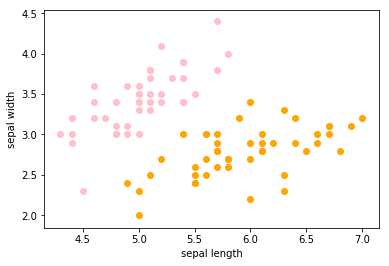

In [7]:
def show_train():
    plt.scatter(x0[:, 0], x0[:, 1], c='pink', label='[0]')
    plt.scatter(x1[:, 0], x1[:, 1], c='orange', label='[1]')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
show_train()

In [12]:
class Node:
    def __init__(self, data, depth=0, lchild=None, rchild=None):
        self.data = data
        self.depth = depth
        self.lchild = lchild
        self.rchild = rchild

In [22]:
class kdTree:
    def __init__(self):
        self.kdTree = None
        self.n = 0
        self.nearest = None
    
    def create(self, dataSet, depth=0):
        if len(dataSet) > 0:
            m, n = np.shape(dataSet)
            self.n = n-1
            axis = depth % self.n
            mid = int(m / 2)
            dataSetcopy = sorted(dataSet, key=lambda x: x[axis])
            node = Node(dataSetcopy[mid], depth)
            if depth == 0:
                self.kdTree = node
            node.lchild = self.create(dataSetcopy[:mid], depth+1)
            node.rchild = self.create(dataSetcopy[mid+1:], depth+1)
            return node
        return None
    
    def preOrder(self, node):
        if node is not None:
            print(node.depth, node.data)
            self.preOrder(node.lchild)
            self.preOrder(node.rchild)
    
    def search(self, x, count=1):
        nearest = []
        for i in range(count):
            nearest.append([-1, None])
        self.nearest = np.array(nearest)
        
        def recurve(node):
            if node is not None:
                axis = node.depth % self.n
                daxis = x[axis] - node.data[axis]
                if daxis < 0:
                    recurve(node.lchild)
                else:
                    recurve(node.rchild)
                dist = sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(x, node.data)))
                for i, d in enumerate(self.nearest):
                    if d[0] < 0 or dist < d[0]:
                        self.nearest = np.insert(self.nearest, i, [dist, node], axis=0)
                        self.nearest = self.nearest[:-1]
                        break
                n = list(self.nearest[:, 0]).count(-1)
                if self.nearest[-n-1, 0] > abs(daxis):
                    if daxis < 0:
                        recurve(node.rchild)
                    else:
                        recurve(node.lchild)

        recurve(self.kdTree)

        knn = self.nearest[:, 1]
        belong = []
        for i in knn:
            belong.append(i.data[-1])
        b = max(set(belong), key=belong.count)

        return self.nearest, b

0 [5.4 3.9 0. ]
1 [4.8 3.4 0. ]
2 [4.9 2.4 1. ]
3 [4.8 3.  0. ]
4 [4.4 3.  0. ]
5 [4.3 3.  0. ]
6 [4.4 2.9 0. ]
5 [4.8 3.  0. ]
6 [4.5 2.3 0. ]
4 [4.6 3.4 0. ]
5 [4.6 3.2 0. ]
6 [4.4 3.2 0. ]
5 [4.7 3.2 0. ]
6 [4.8 3.1 0. ]
3 [5. 3. 0.]
4 [5.  2.3 1. ]
5 [4.9 3.  0. ]
6 [5. 2. 1.]
5 [5.2 2.7 1. ]
6 [5.1 2.5 1. ]
4 [5.1 3.3 0. ]
5 [5.  3.3 0. ]
6 [4.9 3.1 0. ]
5 [5.4 3.  1. ]
2 [5.1 3.8 0. ]
3 [5.1 3.5 0. ]
4 [5.  3.5 0. ]
5 [5.  3.4 0. ]
6 [5.  3.4 0. ]
5 [5.  3.5 0. ]
6 [5.1 3.4 0. ]
4 [5.  3.6 0. ]
5 [4.9 3.6 0. ]
6 [4.6 3.6 0. ]
5 [5.1 3.7 0. ]
6 [5.1 3.5 0. ]
3 [5.4 3.7 0. ]
4 [5.3 3.7 0. ]
5 [5.2 3.5 0. ]
6 [5.2 3.4 0. ]
5 [5.4 3.4 0. ]
6 [5.4 3.4 0. ]
4 [5.2 4.1 0. ]
5 [5.1 3.8 0. ]
6 [5.1 3.8 0. ]
5 [5.4 3.9 0. ]
1 [6.1 2.9 1. ]
2 [5.8 2.7 1. ]
3 [5.7 2.6 1. ]
4 [5.5 2.5 1. ]
5 [5.5 2.4 1. ]
6 [5.5 2.4 1. ]
5 [5.5 2.6 1. ]
6 [5.6 2.5 1. ]
4 [5.7 2.8 1. ]
5 [5.7 2.8 1. ]
6 [5.6 2.7 1. ]
5 [5.7 2.9 1. ]
6 [5.8 2.6 1. ]
3 [6.1 2.8 1. ]
4 [6.  2.7 1. ]
5 [5.8 2.7 1. ]
6 [6.  2.2 1. 

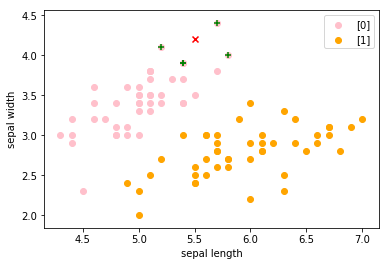

press Enter to show next:
test:
[5.  3.2 0. ] predict: 0.0
nearest:
[5.  3.3 0. ] dist: 0.09999999999999964
[5.1 3.3 0. ] dist: 0.141421356237309
[4.9 3.1 0. ] dist: 0.1414213562373093
[5.  3.4 0. ] dist: 0.19999999999999973
[5.  3.4 0. ] dist: 0.19999999999999973


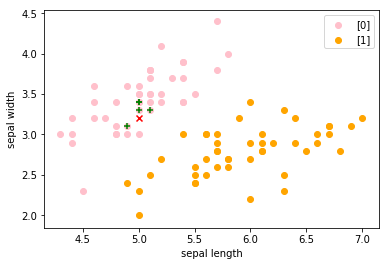

press Enter to show next:
test:
[4.9 3.1 0. ] predict: 0.0
nearest:
[4.9 3.1 0. ] dist: 0.0
[4.9 3.  0. ] dist: 0.10000000000000009
[4.8 3.1 0. ] dist: 0.10000000000000053
[5. 3. 0.] dist: 0.1414213562373093
[4.8 3.  0. ] dist: 0.14142135623730995


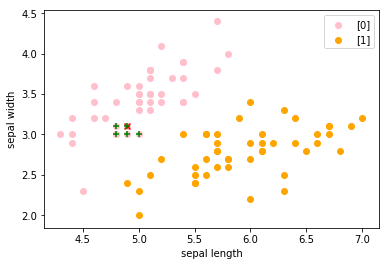

press Enter to show next:
test:
[6.2 2.2 1. ] predict: 1.0
nearest:
[6.3 2.3 1. ] dist: 0.141421356237309
[6.  2.2 1. ] dist: 0.20000000000000018
[6.3 2.5 1. ] dist: 0.31622776601683766
[6.  2.7 1. ] dist: 0.5385164807134505
[5.8 2.6 1. ] dist: 0.5656854249492381


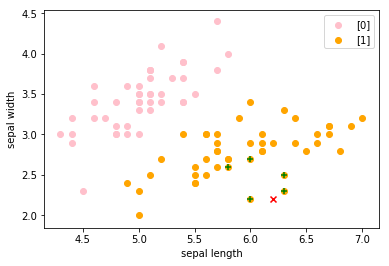

press Enter to show next:
test:
[5.9 3.  1. ] predict: 1.0
nearest:
[6.  2.9 1. ] dist: 0.1414213562373093
[6.1 3.  1. ] dist: 0.1999999999999993
[5.9 3.2 1. ] dist: 0.20000000000000018
[5.7 3.  1. ] dist: 0.20000000000000018
[6.1 2.9 1. ] dist: 0.22360679774997838


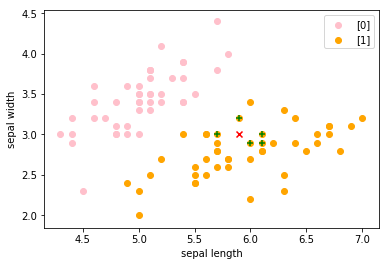

press Enter to show next:
test:
[4.7 3.2 0. ] predict: 0.0
nearest:
[4.7 3.2 0. ] dist: 0.0
[4.6 3.2 0. ] dist: 0.10000000000000053
[4.8 3.4 0. ] dist: 0.22360679774997858
[4.6 3.4 0. ] dist: 0.22360679774997896
[4.8 3.  0. ] dist: 0.22360679774997896


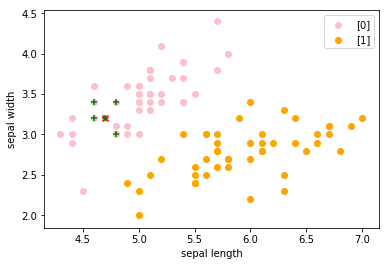

press Enter to show next:
test:
[4.8 3.4 0. ] predict: 0.0
nearest:
[4.8 3.4 0. ] dist: 0.0
[5.  3.4 0. ] dist: 0.20000000000000018
[5.  3.4 0. ] dist: 0.20000000000000018
[4.6 3.4 0. ] dist: 0.20000000000000018
[4.7 3.2 0. ] dist: 0.22360679774997858


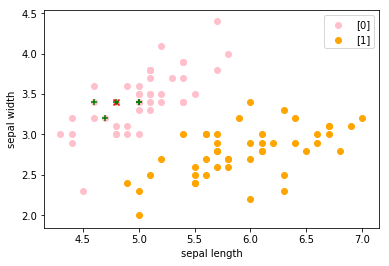

press Enter to show next:
test:
[5.6 2.9 1. ] predict: 1.0
nearest:
[5.6 3.  1. ] dist: 0.10000000000000009
[5.6 3.  1. ] dist: 0.10000000000000009
[5.7 2.9 1. ] dist: 0.10000000000000053
[5.7 3.  1. ] dist: 0.14142135623730995
[5.7 2.8 1. ] dist: 0.14142135623730995


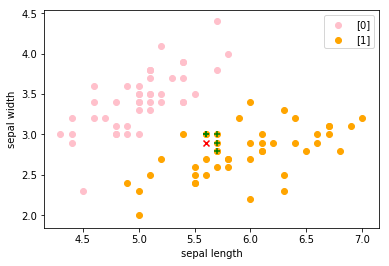

press Enter to show next:
test:
[5.5 2.3 1. ] predict: 1.0
nearest:
[5.5 2.4 1. ] dist: 0.10000000000000009
[5.5 2.4 1. ] dist: 0.10000000000000009
[5.5 2.5 1. ] dist: 0.20000000000000018
[5.6 2.5 1. ] dist: 0.22360679774997896
[5.5 2.6 1. ] dist: 0.30000000000000027


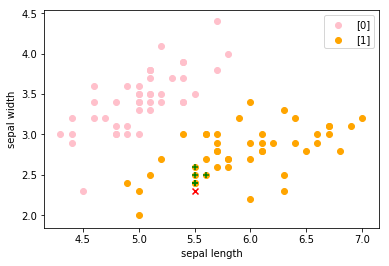

press Enter to show next:
test:
[4.6 3.1 0. ] predict: 0.0
nearest:
[4.6 3.2 0. ] dist: 0.10000000000000009
[4.7 3.2 0. ] dist: 0.14142135623730995
[4.8 3.1 0. ] dist: 0.20000000000000018
[4.4 3.2 0. ] dist: 0.22360679774997838
[4.4 3.  0. ] dist: 0.22360679774997838


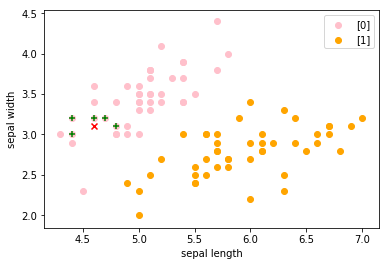

score: 1.0


In [23]:
kdt = kdTree()
kdt.create(train)
kdt.preOrder(kdt.kdTree)

score = 0
for x in test:
    input('press Enter to show next:')
    show_train()
    plt.scatter(x[0], x[1], c='red', marker='x')  # 测试点
    near, belong = kdt.search(x[:-1], 5)  # 设置临近点的个数
    if belong == x[-1]:
        score += 1
    print("test:")
    print(x, "predict:", belong)
    print("nearest:")
    for n in near:
        print(n[1].data, "dist:", n[0])
        plt.scatter(n[1].data[0], n[1].data[1], c='green', marker='+')  # k个最近邻点
    plt.legend()
    plt.show()

score /= len(test)
print("score:", score)

In [24]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
            
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
                
        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x:x)[-1]
        return max_count
    
    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [26]:
clf = KNN(X_train, y_train)

In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
clf.score(X_test, y_test)

1.0

In [29]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


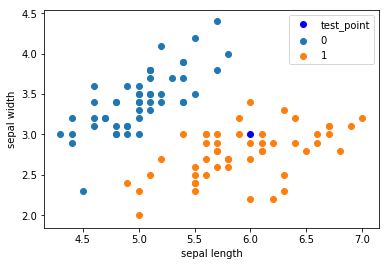

In [31]:
plt.scatter(df[:50]['sepal_length'], df[:50]['sepal_width'], label='0')
plt.scatter(df[50:100]['sepal_length'], df[50:100]['sepal_width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()